In [1]:
%matplotlib inline
#%seaborn inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn
from pandasql import sqldf

In [3]:
from pathlib import Path
# `path.parents[1]` is the same as `path.parent.parent`
d = Path().resolve()
d

PosixPath('/home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01')

In [9]:
## lecture csv
def get_df_from_csv(pPath):
    print("pPath: ", pPath)
    df = pd.read_csv(pPath)
    return df
    

##
#### Question 1.1 charges les données
##

In [19]:
# lecture csv DonneesDiabete_v0r2.csv
fileName = "DonneesDiabete_v0r2.csv"
dfDiabetes = get_df_from_csv(str(d)+"/"+fileName)
dfDiabetes.describe()

pPath:  /home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01/DonneesDiabete_v0r2.csv


,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient
count,768.000000,768.000000,763.000000,740.000000,541.000000,392.000000,757.000000,768.000000
mean,384.500000,3.845052,121.686763,71.594595,29.153420,155.905612,32.457464,33.240885
std,221.846794,3.369578,30.535641,14.468031,10.476982,118.920588,6.924988,11.760232
min,1.000000,0.000000,44.000000,-1.000000,7.000000,14.000000,18.200000,21.000000
25%,192.750000,1.000000,99.000000,64.000000,22.000000,76.750000,27.500000,24.000000
50%,384.500000,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000
75%,576.250000,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,41.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


In [20]:
dfDiabetes.head()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?
0,1,6,148.0,72.0,35.0,NaN,33.6,50,Oui
1,2,1,85.0,66.0,29.0,NaN,26.6,31,Non
2,3,8,183.0,64.0,NaN,NaN,23.3,32,Oui
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui


In [12]:
dfDiabetes.columns

Index(['Patient_ID', 'Nombre de grossesses', 'Glycémie 2 h (mg/dl)',
       'Pression artérielle (mm Hg)', 'Épaisseur pli triceps (mm)',
       'Insuline (uU/mL)', 'Indice de masse corporelle', 'Âge patient',
       'Atteint diabète?'],
      dtype='object')

In [21]:
###
# Creating numeric columns
###

colsAtteintDiab= pd.get_dummies(dfDiabetes['Atteint diabète?'], prefix='AtteintDiab')

colsAtteintDiab

,AtteintDiab_Non,AtteintDiab_Oui
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [22]:
## concatenate side by side
dfDiabetes = pd.concat([dfDiabetes, colsAtteintDiab], axis=1)

##
##### Q 1.1)  colonnes numériques  générées et concaténées
##

In [23]:
dfDiabetes.head()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
0,1,6,148.0,72.0,35.0,NaN,33.6,50,Oui,0,1
1,2,1,85.0,66.0,29.0,NaN,26.6,31,Non,1,0
2,3,8,183.0,64.0,NaN,NaN,23.3,32,Oui,0,1
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui,0,1


##
#### Q 1.2 - Indice de complétude et qualité
##

In [26]:
## combien de nulls?
dfDiabetes.isnull().sum()  

Patient_ID                     0.000000
Nombre de grossesses           0.000000
Glycémie 2 h (mg/dl)           0.006510
Pression artérielle (mm Hg)    0.036458
Épaisseur pli triceps (mm)     0.295573
Insuline (uU/mL)               0.489583
Indice de masse corporelle     0.014323
Âge patient                    0.000000
Atteint diabète?               0.000000
AtteintDiab_Non                0.000000
AtteintDiab_Oui                0.000000
dtype: float64

In [27]:
##combien de nulls en %
100*(dfDiabetes.isnull().sum() / len(dfDiabetes))

Patient_ID                      0.000000
Nombre de grossesses            0.000000
Glycémie 2 h (mg/dl)            0.651042
Pression artérielle (mm Hg)     3.645833
Épaisseur pli triceps (mm)     29.557292
Insuline (uU/mL)               48.958333
Indice de masse corporelle      1.432292
Âge patient                     0.000000
Atteint diabète?                0.000000
AtteintDiab_Non                 0.000000
AtteintDiab_Oui                 0.000000
dtype: float64

##
##### Q 1.2) Il y a trop de nulls dans le colonne 'Épaisseur pli triceps (mm)' et 'Insuline (uU/mL)'
##### En plus, via la commande 'describe()' on a identifié une pression arterielle négative
##

0       NaN
1       NaN
2       NaN
3      94.0
4     168.0
5       NaN
6      88.0
7       NaN
8     543.0
9       NaN
10      NaN
11      NaN
12      NaN
13    846.0
14    175.0
15      NaN
16    230.0
17      NaN
18     83.0
19     96.0
Name: Insuline (uU/mL), dtype: float64

##
#### Q 1.3 Pré-traitement
##

In [29]:
## La seule colonne ayant un seuil de complétude < 60% est 'Insuline (uU/mL)'
dfDiabetes.drop(axis=1, columns='Insuline (uU/mL)')

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
0,1,6,148.0,72.0,35.0,33.6,50,Oui,0,1
1,2,1,85.0,66.0,29.0,26.6,31,Non,1,0
2,3,8,183.0,64.0,NaN,23.3,32,Oui,0,1
3,4,1,89.0,66.0,23.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,43.1,33,Oui,0,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101.0,76.0,48.0,32.9,63,Non,1,0
764,765,2,122.0,70.0,27.0,36.8,27,Non,1,0
765,766,5,121.0,72.0,23.0,26.2,30,Non,1,0
766,767,1,126.0,60.0,NaN,30.1,47,Oui,0,1


In [31]:
### removing NA
dfDiabetes.dropna(inplace=True)
dfDiabetes

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui,0,1
6,7,3,78.0,50.0,32.0,88.0,31.0,26,Oui,0,1
8,9,2,197.0,70.0,45.0,543.0,30.5,53,Oui,0,1
13,14,1,189.0,60.0,23.0,846.0,30.1,59,Oui,0,1
...,...,...,...,...,...,...,...,...,...,...,...
753,754,0,181.0,88.0,44.0,510.0,43.3,26,Oui,0,1
755,756,1,128.0,88.0,39.0,110.0,36.5,37,Oui,0,1
760,761,2,88.0,58.0,26.0,16.0,28.4,22,Non,1,0
763,764,10,101.0,76.0,48.0,180.0,32.9,63,Non,1,0


In [32]:
### Maintenant, il faut enlever les observations avec des valeurs invalides, s'il en reste
dfDiabetes.describe()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Non,AtteintDiab_Oui
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,389.512821,3.310256,122.574359,70.623077,29.146154,156.417949,33.074615,30.900000,0.671795,0.328205
std,215.649753,3.215267,30.810781,12.506820,10.539517,118.985870,7.042288,10.215053,0.470163,0.470163
min,4.000000,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000
25%,207.500000,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,23.000000,0.000000,0.000000
50%,387.500000,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,1.000000,0.000000
75%,568.750000,5.000000,143.000000,78.000000,37.000000,190.000000,37.075000,36.000000,1.000000,1.000000
max,766.000000,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000,1.000000


##
##### Q 1.3. En enlevant le observations ayant null, on a aussi enlever l'obs avec pression artérielle négative. Les stats ci-haut semble correctes
##

##
#### Q 1.4  - Matrice de corrélation
## 

In [45]:
## On s'intéresse seulement aux numériques. En plus, Patient_Id et AtteintDiab_Non non ne nous intéressent
### la première pour être un Id, la deuxième parce que l'on a la var complémentaire AtteintDiab_Oui
dfDiabOnlyNum =  dfDiabetes.select_dtypes(exclude='object')
dfDiabOnlyNum = dfDiabOnlyNum.drop(axis=1, columns=['Patient_ID','AtteintDiab_Non'])
dfDiabOnlyNum.dtypes

Nombre de grossesses             int64
Glycémie 2 h (mg/dl)           float64
Pression artérielle (mm Hg)    float64
Épaisseur pli triceps (mm)     float64
Insuline (uU/mL)               float64
Indice de masse corporelle     float64
Âge patient                      int64
AtteintDiab_Oui                  uint8
dtype: object

In [46]:
corr = dfDiabOnlyNum.corr()
corr

,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Oui
Nombre de grossesses,1.000000,0.197412,0.217072,0.092421,0.076484,-0.023766,0.679387,0.262370
Glycémie 2 h (mg/dl),0.197412,1.000000,0.213473,0.197381,0.582844,0.211783,0.346654,0.518090
Pression artérielle (mm Hg),0.217072,0.213473,1.000000,0.234113,0.101845,0.303252,0.303078,0.189404
Épaisseur pli triceps (mm),0.092421,0.197381,0.234113,1.000000,0.181659,0.665514,0.167971,0.257465
Insuline (uU/mL),0.076484,0.582844,0.101845,0.181659,1.000000,0.228420,0.215570,0.307765
Indice de masse corporelle,-0.023766,0.211783,0.303252,0.665514,0.228420,1.000000,0.071045,0.269295
Âge patient,0.679387,0.346654,0.303078,0.167971,0.215570,0.071045,1.000000,0.357979
AtteintDiab_Oui,0.262370,0.518090,0.189404,0.257465,0.307765,0.269295,0.357979,1.000000


<AxesSubplot:>

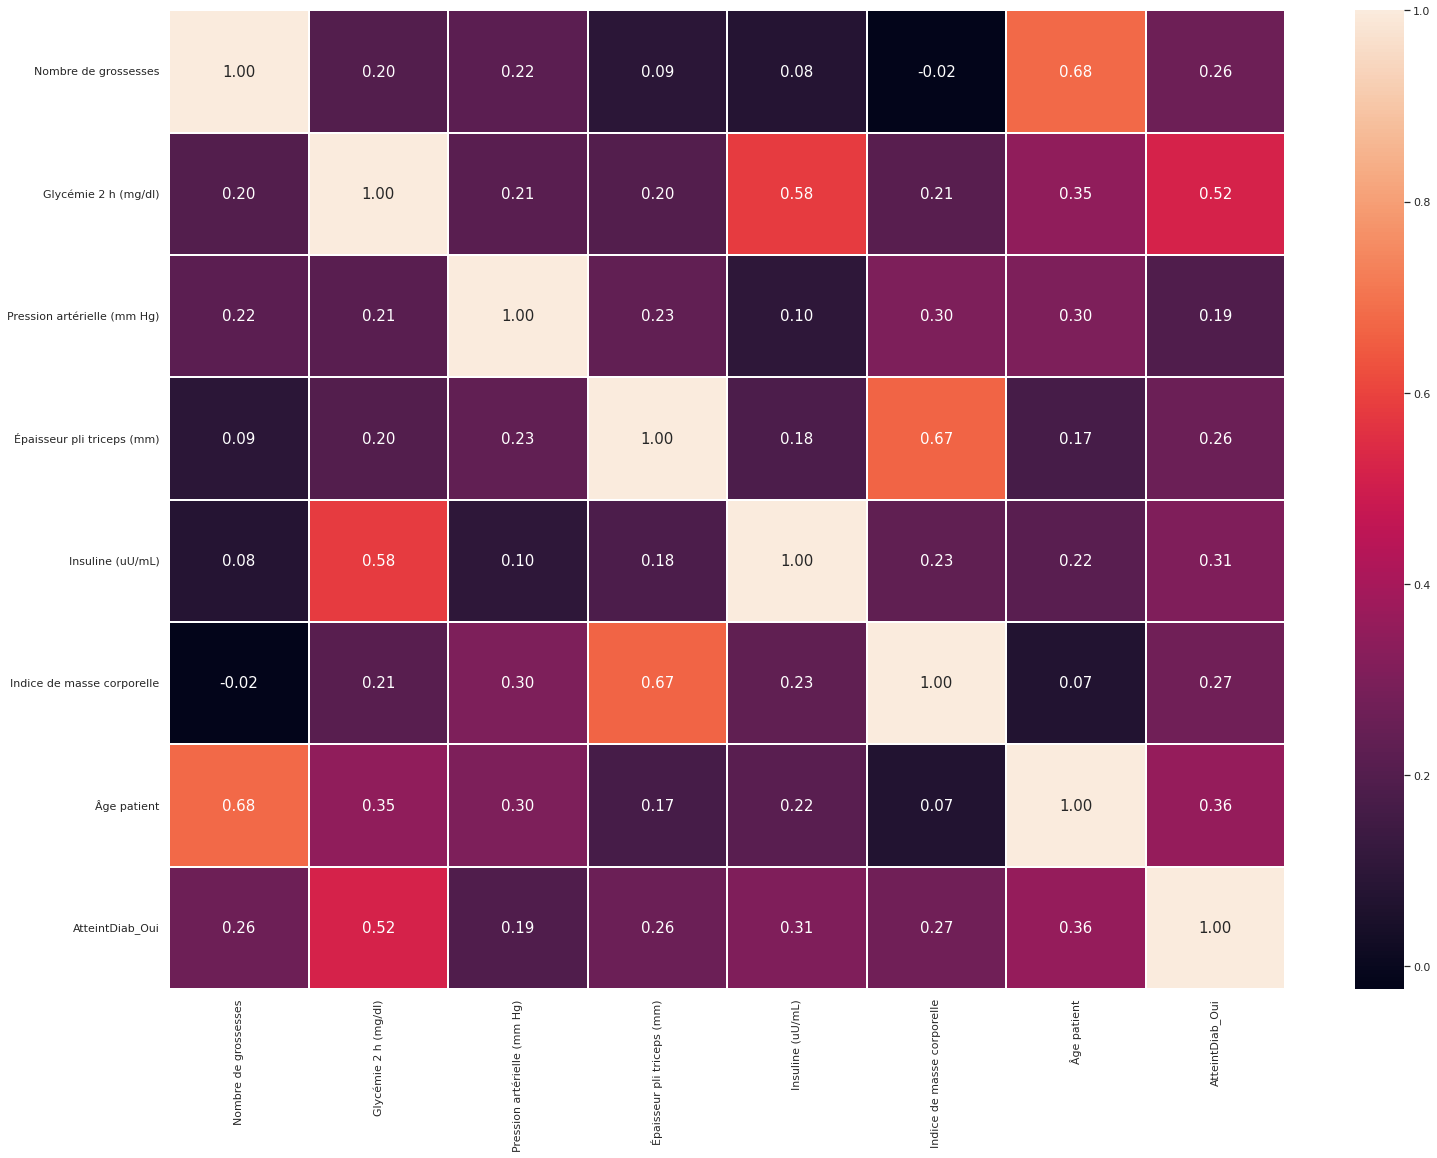

In [52]:
sn.set (rc = {'figure.figsize':(25, 18)})
sn.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size":15}, linewidths=1.5)

##
#### Q 1.4) dans ce dataset, les 3 variables qui on plus d'impact sur le développement de diabètes sont: Glycémie (0.52), Âge (0.36) et Insuline (0.31)
##

##
#### Q 1.5) moyenne, écart-type, min, Q1, Q2, Q3, max
#### --> C'est fait avec la commande 'describe' que l'on répète ici
##

In [53]:
### moyenne(mean) , écart-type(std), min(min), Q1(25%), Q2(50%), Q3(75%), max(max)
dfDiabetes.describe()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Non,AtteintDiab_Oui
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,389.512821,3.310256,122.574359,70.623077,29.146154,156.417949,33.074615,30.900000,0.671795,0.328205
std,215.649753,3.215267,30.810781,12.506820,10.539517,118.985870,7.042288,10.215053,0.470163,0.470163
min,4.000000,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000
25%,207.500000,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,23.000000,0.000000,0.000000
50%,387.500000,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,1.000000,0.000000
75%,568.750000,5.000000,143.000000,78.000000,37.000000,190.000000,37.075000,36.000000,1.000000,1.000000
max,766.000000,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000,1.000000


##
#### Q 1.6 histogramme fréquence distrib âge patient
##

Âge patient    1.396129
dtype: float64


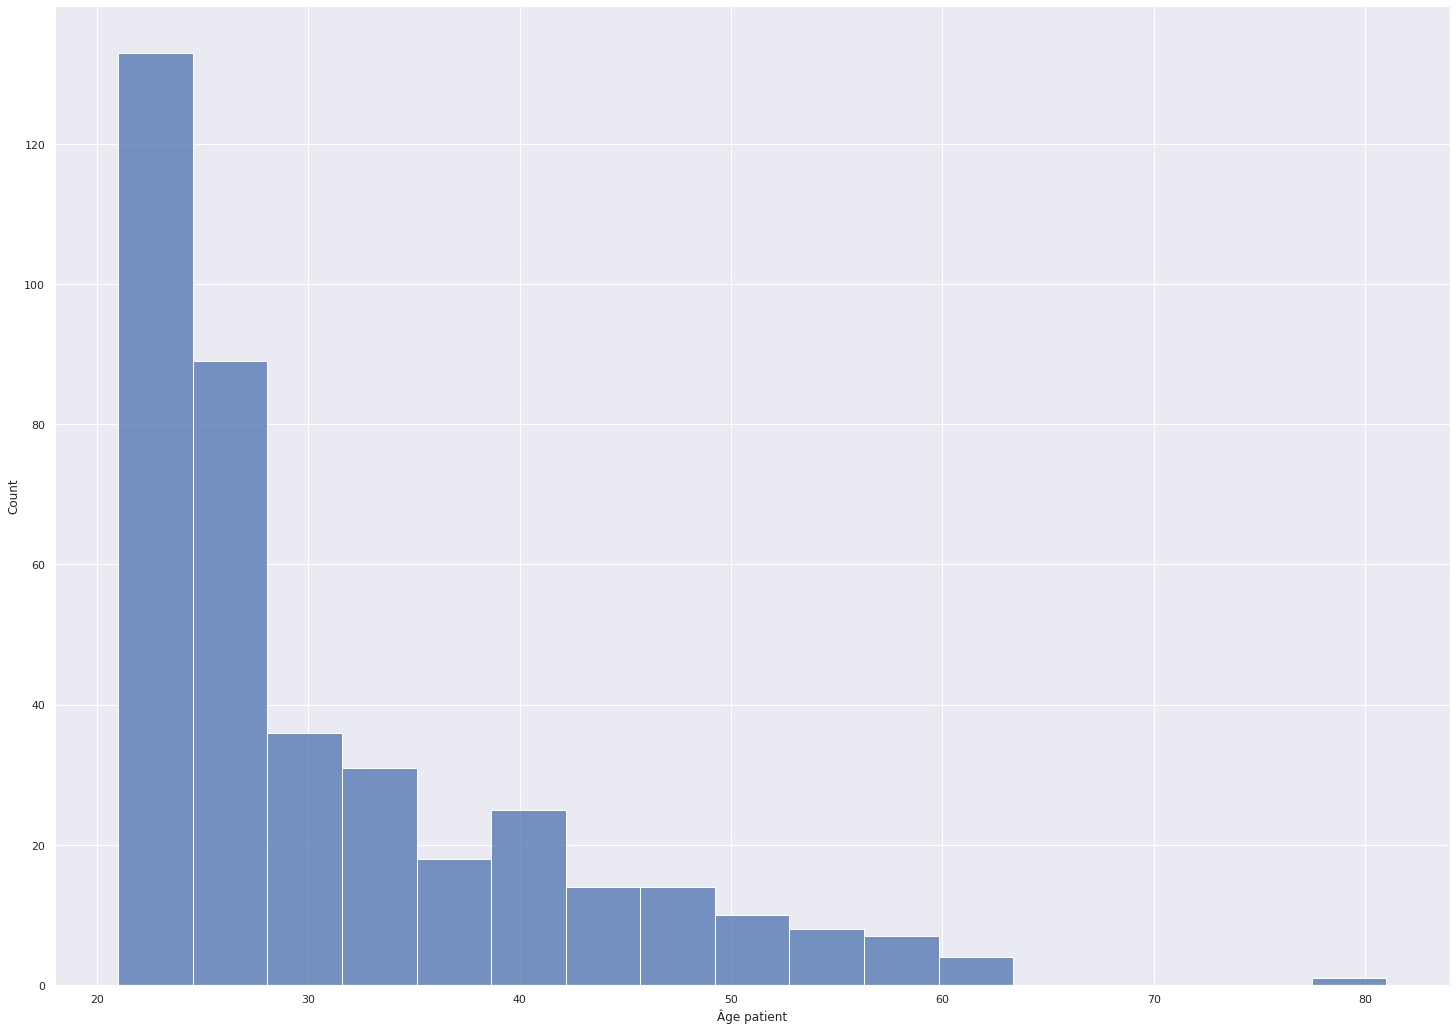

In [61]:
colAge = dfDiabetes['Âge patient']
sn.histplot(colAge)
print(pd.DataFrame(colAge).skew())

##
##### 1.6) ---> La variable est clairement assymétrique avec un skew = 1.396129
##